In [3]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import csv
import numpy as np
import subprocess,time

In [10]:
def create_graph(path,title="Scale Time"):
    d={}
    with open(path,"r") as csvFile:
        reader=csv.reader(csvFile)
        for row in reader:
            d[row[0]]=int(row[1])
    df=pd.Series(d)
    df.plot()
    plt.xlabel("seconds")
    plt.ylabel("number of pods")
    plt.title(title)
    plt.show()

In [5]:
def scale(desired_count,deployment_name):
    POD_COUNT_COMMAND=f"kubectl get pods --selector=app={deployment_name} | grep 'Running\|Terminating' | wc -l"
    SCALE_COMMAND=f"kubectl scale deployment {deployment_name} --replicas {desired_count}"
    data=[]
    second=0
    INTERVAL=0.5
    subprocess.run(["sh","-c",SCALE_COMMAND])
    count=int(subprocess.run(['sh', '-c',POD_COUNT_COMMAND], stdout=subprocess.PIPE).stdout.decode('utf-8'))
    data.append([second,count])
    while desired_count!=count:
        time.sleep(INTERVAL)
        second+=INTERVAL
        count=int(subprocess.run(['sh', '-c',POD_COUNT_COMMAND], stdout=subprocess.PIPE).stdout.decode('utf-8'))
        data.append([second,count])
    t=time.time()
    file_name=f"scale/scale_{desired_count}_{t}.csv"
    with open(file_name,mode="w") as csv_file:
        writer=csv.writer(csv_file,delimiter=",")
        for d in data:
            writer.writerow(d)

    return file_name

In [ ]:
d=scale(10,"nginx")
create_graph(d)

d=scale(0,"nginx")
create_graph(d)

In [ ]:
d=scale(10,"unikernel")
create_graph(d)

d=scale(0,"unikernel")
create_graph(d)

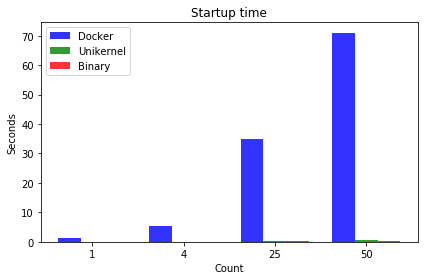

In [6]:
n_groups = 4
means_docker = (1.146,5.384, 35.081,70.987)
means_unikernel = (0.015,0.066, 0.335, 0.646)
means_bash=(0.005,0.022,0.145,0.336)
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8

rects1 = plt.bar(index, means_docker, bar_width,
alpha=opacity,
color='b',
label='Docker')

rects2 = plt.bar(index + bar_width, means_unikernel, bar_width,
alpha=opacity,
color='g',
label='Unikernel')

rects3=plt.bar(index+bar_width*2,means_bash,bar_width,alpha=opacity,
              color="r",label="Binary")

plt.xlabel('Count')
plt.ylabel('Seconds')
plt.title('Startup time')
plt.xticks(index + bar_width, ('1','4', '25', '50'))
plt.legend()

plt.tight_layout()
plt.show()

# Scale UP

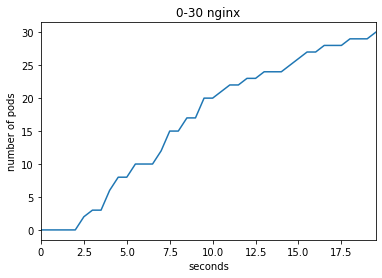

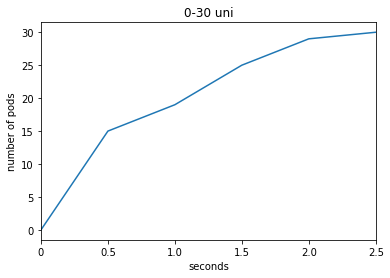

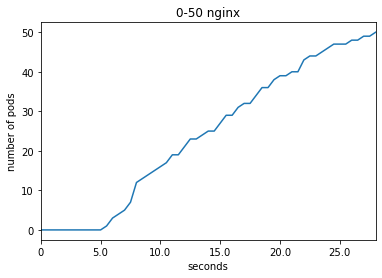

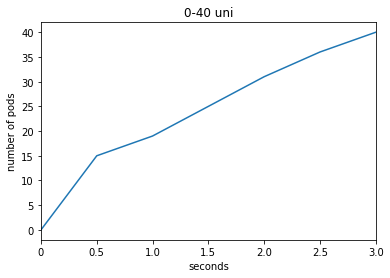

In [11]:
create_graph("/Users/atakanyenel/Desktop/thesis/components/node-watcher/scale/scale_30.csv","0-30 nginx")
create_graph("/Users/atakanyenel/Desktop/thesis/components/node-watcher/scale/scale_30_uni.csv","0-30 uni")
create_graph("/Users/atakanyenel/Desktop/thesis/components/node-watcher/scale/scale_50.csv","0-50 nginx")
create_graph("/Users/atakanyenel/Desktop/thesis/components/node-watcher/scale/scale_40_uni.csv","0-40 uni")

# Scale Down

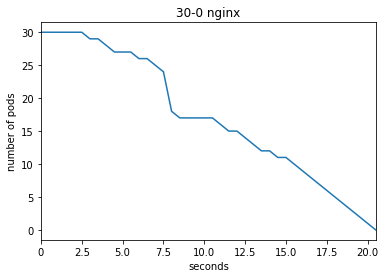

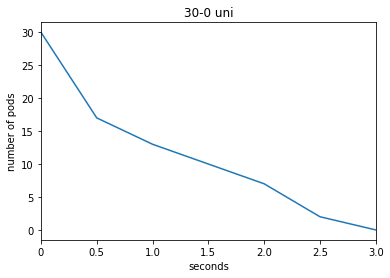

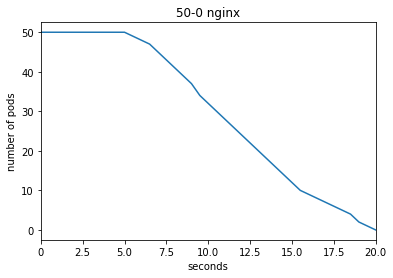

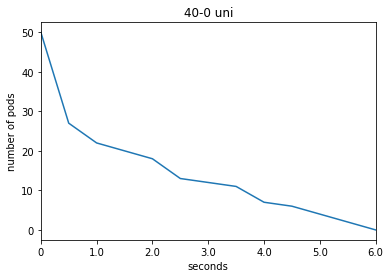

In [12]:
create_graph("/Users/atakanyenel/Desktop/thesis/components/node-watcher/scale/scale_down_30.csv","30-0 nginx")
create_graph("/Users/atakanyenel/Desktop/thesis/components/node-watcher/scale/scale_down_30_uni.csv","30-0 uni")
create_graph("/Users/atakanyenel/Desktop/thesis/components/node-watcher/scale/scale_down_50.csv","50-0 nginx")
create_graph("/Users/atakanyenel/Desktop/thesis/components/node-watcher/scale/scale_down_40_uni.csv","40-0 uni")